# Assignment 2
As a project analyst for a mobile application, I am testing changes to a key existing feature and have 2 possible variants. After running an experiment for 2 weeks, The following are some data with experiment results.

In this notebook, we will look at the analysis of the results.

First we will import the relevant libraries that will be used.

In [26]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Now we're going to import a data file. In this data file, we have the following variables:

* Age - the age of a user
* Location - where they live (e.g., Location1, Location2, location3)
* Device Type - the type of device they have (e.g., Device1, Device2, Device 3)
* Variant - release changes to a key feature (e.g., Variant A, Variant B)
* Time Spent- Average time spent, in minutes, for each feature
* CTR -  Click-Through-Rate, the user is moving through different parts of the feature. 0 means they have not clicked anything, and 1 means the user has fully clicked on everything in a feature.

In [27]:
# Load the Sales_data dataset directly from Github.
df = pd.read_csv('https://raw.githubusercontent.com/Lily-QianWang/schulich_data_science/main/experiment_dataset.csv')

In [9]:
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


In [4]:
# Get a summary of the dataset structure.
df.describe

<bound method NDFrame.describe of      Unnamed: 0  Age   Location   Device    Variant  Time Spent       CTR
0             0   62  Location2  Device2    Control   13.928669  0.084776
1             1   18  Location1  Device1  Variant B   11.310518  0.096859
2             2   21  Location2  Device1  Variant B   24.842100  0.097630
3             3   21  Location1  Device3  Variant B   20.061300  0.109783
4             4   57  Location1  Device2  Variant B   34.495503  0.068579
..          ...  ...        ...      ...        ...         ...       ...
995         995   39  Location2  Device2  Variant B   17.252030  0.092211
996         996   38  Location3  Device2    Control   30.075898  0.078151
997         997   60  Location2  Device3    Control   31.929223  0.125213
998         998   35  Location2  Device2  Variant B   14.680299  0.095423
999         999   55  Location1  Device1  Variant B   25.803169  0.166688

[1000 rows x 7 columns]>

In [10]:
# Take a look of the first few lines of dataset.
df.head()

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579


From the above tables, we decide to remove the Unnamed:0 column. After the cleaning process, use df.info() to double-check whether the data is clean.

In [4]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1000 non-null   int64  
 1   Location    1000 non-null   object 
 2   Device      1000 non-null   object 
 3   Variant     1000 non-null   object 
 4   Time Spent  1000 non-null   float64
 5   CTR         1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


### 1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

To see which feature (if any) results in CTR or Time Spent lift, we compare users by Location, Device Type, Age and Variants. We can use statistical tests to support our analysis. Firstly, we focus on analyzing the control group that has no variant applied for testing the impact of location, device type and age in CTR or Time Spent Lift.

In [11]:
control_df = df[df['Variant'] == 'Control']

In [12]:
control_df.groupby('Location')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Location,,
Location1,19.660508,0.099729
Location2,20.298490,0.098512
Location3,20.234980,0.097352


The means of time spent and CTR looks mostly the same in each location. Let's use an ANOVA test to validate each metric. If they are statistically the same, they should have a high p-value.

In [13]:
# checking Time Spent
loc_1 = control_df[control_df['Location'] == 'Location1']['Time Spent']
loc_2 = control_df[control_df['Location'] == 'Location2']['Time Spent']
loc_3 = control_df[control_df['Location'] == 'Location2']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)


F_onewayResult(statistic=0.6543289661497135, pvalue=0.5204112404149545)


In [14]:
# checking CTR
loc_1 = control_df[control_df['Location'] == 'Location1']['CTR']
loc_2 = control_df[control_df['Location'] == 'Location2']['CTR']
loc_3 = control_df[control_df['Location'] == 'Location2']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)


F_onewayResult(statistic=0.11549837839446847, pvalue=0.890955201038286)


For all 3 locations, it seems that the users have similar behaviour. There is no statistically significant difference between the 3 locations.

In [15]:
control_df.groupby('Device')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Device,,
Device1,19.754760,0.099213
Device2,20.134126,0.098021
Device3,20.329319,0.098362


The means of time spent and CTR looks mostly the same by using different device. Let's use an ANOVA test to validate each metric. If they are statistically the same, they should have a high p-value.

In [16]:
# checking Time Spent
loc_1 = control_df[control_df['Device'] == 'Device1']['Time Spent']
loc_2 = control_df[control_df['Device'] == 'Device2']['Time Spent']
loc_3 = control_df[control_df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.38234475155655273, pvalue=0.6825553776327153)


In [17]:
# checking CTR
loc_1 = control_df[control_df['Device'] == 'Device1']['CTR']
loc_2 = control_df[control_df['Device'] == 'Device2']['CTR']
loc_3 = control_df[control_df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.10031914209301424, pvalue=0.9045756948934275)


For all 3 devices, it seems that the users have similar behaviour. There is no statistically significant difference between the 3 devices.

Let's draw a graph to see whether age results in CTR or Time Spent lift.

<Axes: xlabel='Age', ylabel='Time Spent'>

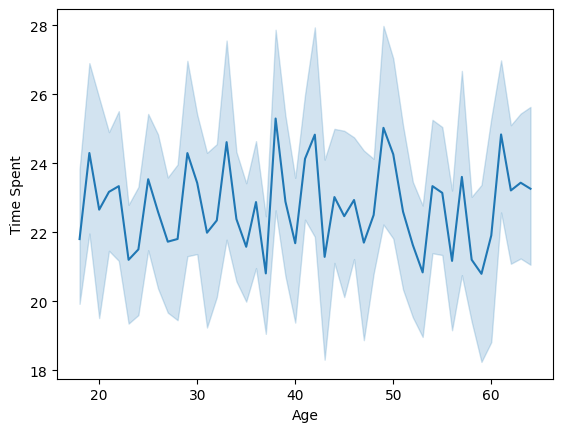

In [18]:
# Checking age by drawing a line plot showing the overall performance of 'Age' among different 'Time Spent'.
sns.lineplot(data=df, x="Age", y="Time Spent")

<Axes: xlabel='Age', ylabel='CTR'>

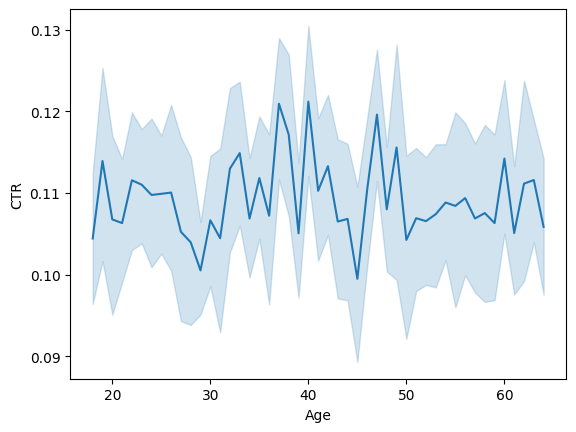

In [19]:
# Draw a line plot showing the overall performance of 'Age' among different 'CTR'.
sns.lineplot(data=df, x="Age", y="CTR")

From the above two line plots, we can conclude that 'Age' does not result in CTR or time spent lift.

All of the features of 'Location', 'devices' and 'age' does not result in CTR or time spent lift, thus let's check whether variants impact the CTR or time spent. 

Now, we focus on analyzing features of 'Variants' in all of the data which contains the control group and groups that had applied the variants.

In [29]:
df.groupby('Variant')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Variant,,
Control,20.070781,0.098554
Variant A,24.805547,0.120269
Variant B,23.343783,0.108933


The means of time spent and CTR looks different in each variant. Let's use an ANOVA test to validate each metric. If they are statistically different, they should have a low p-value.

In [20]:
# Checking time spent
varA = df[df['Variant']=='Variant A']['Time Spent']
varB = df[df['Variant']=='Variant B']['Time Spent']
control = df[df['Variant']=='Control']['Time Spent']

p_val = stats.f_oneway(varA, varB, control)
print(p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


In [23]:
# Checking CTR
varA = df[df['Variant']=='Variant A']['CTR']
varB = df[df['Variant']=='Variant B']['CTR']
control = df[df['Variant']=='Control']['CTR']

p_val = stats.f_oneway(varA, varB, control)
print(p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


Based on the ANOVA, we see that both the time spent and CTR have statistically significant results. This means that the variants and the control group have completely different behaviours in their time spent and CTR after applying the variants.

Therefore, only 'variant' results in CTR or time spent lift. 

### 2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

## Analyzing Experiment Results
Now, applying an independent two-sample test for each variant compared to the control, and then the variants compare to each other.

In [35]:
# Compare Time Spent

var1 = df[df['Variant'] == 'Variant A']['Time Spent']
var2 = df[df['Variant'] == 'Variant B']['Time Spent']
control = df[df['Variant'] == 'Control']['Time Spent']

p_val = stats.ttest_ind(var1, control)
p_val_2 = stats.ttest_ind(var2, control)
p_val_3 = stats.ttest_ind(var1, var2)
print(p_val)
print(p_val_2)
print(p_val_3)

Ttest_indResult(statistic=12.142363487472364, pvalue=8.488565644996449e-31)
Ttest_indResult(statistic=8.174237395991806, pvalue=1.496358076285182e-15)
Ttest_indResult(statistic=3.6788175394209075, pvalue=0.0002534771014765265)


In [38]:
# checking ad CTR
var1 = df[df['Variant'] == 'Variant A']['CTR']
var2 = df[df['Variant'] == 'Variant B']['CTR']
control = df[df['Variant'] == 'Control']['CTR']

p_val = stats.ttest_ind(var1, control)
p_val_2 = stats.ttest_ind(var2, control)
p_val_3 = stats.ttest_ind(var1, var2)
print(p_val)
print(p_val_2)
print(p_val_3)

Ttest_indResult(statistic=13.829424737499187, pvalue=1.9602781373243157e-38)
Ttest_indResult(statistic=6.4718143491783255, pvalue=1.8743198199982106e-10)
Ttest_indResult(statistic=7.08499696316128, pvalue=3.587180487986577e-12)


After comparing time spent and CTR, we see that both Variant A and Variant B resulted statistically significantly between both variants and the control, there is also some difference between Variant A and Variant B. So there should be a Variant that performs better than the other. 

Now let's see which variant worked better.

In [10]:
# Calculating the average time spent for the control and each variant.
df.groupby('Variant')[['Time Spent']].mean()

,Time Spent
Variant,
Control,20.070781
Variant A,24.805547
Variant B,23.343783


In [12]:
# Calculating the average CTR for the control and each variant.
df.groupby('Variant')[['CTR']].mean()

,CTR
Variant,
Control,0.098554
Variant A,0.120269
Variant B,0.108933


It looks like Variant A resulted in a higher average time spent and CTR than control and Variant B. Also, we know these results are statistically significant. Thus, we should implement Variant A to lift the time spent and CTR.

And since we know this result is not a coincidence and is statistically significant, we should implement Variant A to drive higher spending in our users.

### 3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy.
Based on the above analysis and results, we can make a recommendation to the engineering team to deploy variant A. We know that variants A and B both lift time spent and CTR. In more detail, after applying the two sample tests and ANOVA tests, Variant A resulted in a higher average time spent and higher CTR than Variant B.

From a business perspective, we should select variant A which has a greater positive impact on the CTR and time spent, since if the customers spend more time moving through different parts of the feature more fully, it means that the product is more attractive and easier to sell. More sale results in more revenue.

Therefore, in this experiment, we should make a recommendation to the engineering team to deploy variant A, acknowledging customers will spend more time and click more parts of the feature which could lead to more sales of products and gaining more revenue. 

### 4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

The roll-out plan is how we would gradually roll out a feature according to monitoring performance. It helps us identify the need for changes and update the features accordingly. In this experiment, we should plan the roll-out plan by updating the feature to a different percentage of users with 5%, 10%, 25%, 50%, 75% and 100%. Increasing the percentage of rolling out the variant, we will also increase the duration between each stage to ensure the new feature works properly. For example, we can update the feature to 5% of the customers for 1-2 days until the feedback is positive and stabilized. Then, we introduce the updated feature to 10% of users and increase the duration to 3-4 days until we deploy the variants to all users. 
For the feedback at each stage, we collect the CTR, the time spent, and the corresponding revenue gained. If the collected feedback is unsatisfactory, such as a decline in revenue, time spent and CTR, we should stop deploying the variant. Introducing the feature to the audience with an increasing percentage of users and duration between each stage can alleviate risks, stabilize the revenue and prevent the problems caused by users' experience and the complexity of the change. 
